<a href="https://colab.research.google.com/github/camilachavarriaga2001-hash/Integracion_de_datos-/blob/main/Parcial1_Integracion_de_datos__ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de Estudio**

Mediante el presente trabajo se busca dar respuesta al siguiente objetivo específico: una entidad del sector salud en Colombia desea realizar un estudio sobre los hábitos de las personas en América que podrían estar relacionados con el riesgo de sufrir un ataque cardíaco.

las variables numericas utilizadas son:
* Heart Attack Risk: Es el indicador principal que mide la probabilidad de que una persona sufra un ataque cardíaco.

* Cholesterol: Representa el nivel de colesterol en sangre.

* Exercise Hours Per Week: Número de horas que una persona realiza ejercicio semanalmente.

* Triglycerides: Nivel de triglicéridos en sangre.

* Income:ingreso económico de la persona.

* Age: Edad del individuo.

* BMI (Índice de Masa Corporal): Mide la relación entre peso y altura.

* Stress Level: Nivel de estrés reportado.

* Heart Rate: Frecuencia cardíaca.

* Sleep Hours Per Day: Número de horas de sueño diario.

Para cumplir con el objetivo específico mencionado anteriormente, se emplearon diferentes técnicas, entre ellas: análisis de correlación, teoría de la credibilidad, integración de variables, construcción de histogramas y aplicación de diversas métricas.


# 0. Importamos Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Cargamos la base de datos.

In [ ]:
nxl = '/content/drive/MyDrive/Colab Notebooks/Integracion y prospectiva /heart_attack_dataset_completo.xlsx'
XDB=pd.read_excel(nxl)
display(XDB)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


# 2. Hacemos la Matriz de correlación

In [ ]:
numeric_vars_for_correlation = ["Age", "Cholesterol", "Heart Rate", "Exercise Hours Per Week",
                                "Income", "BMI", "Triglycerides", "Sleep Hours Per Day", "Stress Level"]
target_variable = "Heart Attack Risk"

df_selected = XDB[numeric_vars_for_correlation + [target_variable]]

# Obtener las correlaciones de las variables numéricas con la variable objetivo
correlations = df_selected.corr()[target_variable].sort_values(ascending=False)

print("\nCorrelación con Heart Attack Risk:")
display(correlations)


Correlación con Heart Attack Risk:


,Heart Attack Risk
Heart Attack Risk,1.000000
Cholesterol,0.019340
Exercise Hours Per Week,0.011133
Triglycerides,0.010471
Income,0.009628
Age,0.006403
BMI,0.000020
Stress Level,-0.004111
Heart Rate,-0.004251
Sleep Hours Per Day,-0.018528


# 3. Aplicamos la teoria de credibilidad

In [ ]:
print("List of countries in df_america:")
print(df_america['Country'].unique())

List of countries in df_america:
['Argentina' 'Canada' 'Brazil' 'United States' 'Colombia']


In [ ]:
def credibilidadx(XDo,XDe,k):
  print("Los datos de referencia para Colombia son:\n",XDo.describe())
  arr=XDe
  print(f"Los datos de referencia para otro {k} es:\n",arr.describe())

  #Se estiman los paramétros de la credibilidad
  NDo=len(XDo);NDe=len(arr)

  #1. Esperanza de la Varianza
  EPV=(NDo*np.var(XDo)+NDe*np.var(arr))/(NDo+NDe)

  #2. Varianza Hipótetica de la Media
  uh=(NDo*np.mean(XDo)+NDe*np.mean(arr))/(NDo+NDe)
  VHM=((NDo*(np.mean(XDo)**2)+NDe*(np.mean(arr)**2))/(NDo+NDe))-uh**2

  #3. El factor de credibilida es
  fc=EPV/VHM
  print(f"El factor de credibilidad para {k} es: {fc}")

  #4. La credibilidad es:
  Cr=NDo/(NDo+fc)
  print(f"La credibilidad para {k} es: {Cr}")

  return NDo,NDe,fc,Cr


# Colombia es la base
XDo = df_america[df_america["Country"]=="Colombia"]["Cholesterol"]

# Comparar con Argentina
XDe = df_america[df_america["Country"]=="Argentina"]["Cholesterol"]
credibilidadx(XDo,XDe,"Argentina")

# Comparar con Canada
XDe = df_america[df_america["Country"]=="Canada"]["Cholesterol"]
credibilidadx(XDo,XDe,"Canada")

# Comparar con Brazil
XDe = df_america[df_america["Country"]=="Brazil"]["Cholesterol"]
credibilidadx(XDo,XDe,"Brazil")

# Comparar con Estados Unidos
XDe = df_america[df_america["Country"]=="United States"]["Cholesterol"]
credibilidadx(XDo,XDe,"United States")


Los datos de referencia para Colombia son:
 count    429.000000
mean     261.846154
std       81.287362
min      120.000000
25%      198.000000
50%      258.000000
75%      335.000000
max      400.000000
Name: Cholesterol, dtype: float64
Los datos de referencia para otro Argentina es:
 count    471.000000
mean     261.520170
std       83.564341
min      120.000000
25%      189.000000
50%      260.000000
75%      337.000000
max      400.000000
Name: Cholesterol, dtype: float64
El factor de credibilidad para Argentina es: 256105.24146007997
La credibilidad para Argentina es: 0.0016722913773939917
Los datos de referencia para Colombia son:
 count    429.000000
mean     261.846154
std       81.287362
min      120.000000
25%      198.000000
50%      258.000000
75%      335.000000
max      400.000000
Name: Cholesterol, dtype: float64
Los datos de referencia para otro Canada es:
 count    440.000000
mean     256.847727
std       78.697929
min      120.000000
25%      190.750000
50%      253.5

(429, 420, np.float64(533.6829359658183), np.float64(0.4456295878659185))

# 4. Integramos los 2 paises

El Coeficiente de asimetria original es: 0.028433473146044334
El Coeficiente de kurtosis original es: -1.1716574947470142
El numero de datos integrados es: 36
El coeficiente de asimetria es: [0.02843347]
El coeficiente de kurtosis es: [-1.17165749]
El coeficiente de asimetria es: [-0.00948474]
El coeficiente de kurtosis es: [-1.03034621]



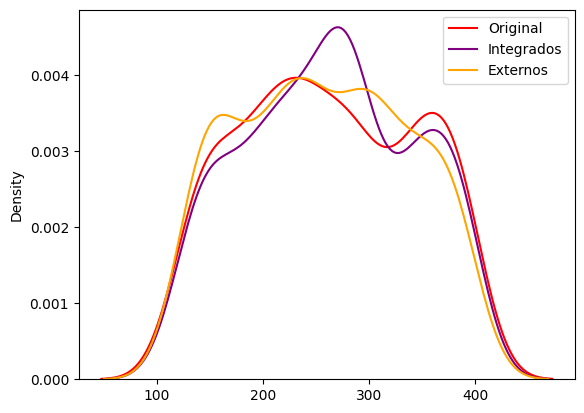

In [ ]:
# Colombia y Canadá
XDo=np.array (df_america[df_america["Country"]=="Colombia"]["Cholesterol"])
XDF1=np.array (df_america[df_america["Country"]=="Canada"]["Cholesterol"])
uo=np.mean(XDo);uf1=np.mean(XDF1)
sigmao=np.std(XDo);sigmaf1=np.std(XDF1)
print("El Coeficiente de asimetria original es:",skew(XDo))
# The kurtosis function was not imported in this cell, assuming it's available in the runtime
from scipy.stats import kurtosis
print("El Coeficiente de kurtosis original es:",kurtosis(XDo))

#Se procede con la integración de los externos
XDInt=[]

for k in range(len(XDF1)):
  #print(XDF1[k]) # commented out to reduce output
  x=XDF1[k]    #Dato a integrar
  VPo=np.exp(-0.5*((x-uo)/sigmao)**2)
  VPf1=np.exp(-0.5*((x-uf1)/sigmaf1)**2)

  if VPf1<VPo and VPo>0.95:# asegura que los datos sean confiables con respecto a los datos observados.
    XDInt.append(x)
    #print("El dato de integración esta en la fila:",k) # commented out to reduce output
  #else:
    #print("El dato no se integra") # commented out to reduce output

XDo=np.array (XDo).reshape(-1,1) # quitar la estructura a la array
XDInt=np.array (XDInt).reshape(-1,1)
XDT=np.concatenate((XDo,XDInt),axis=0)#base de datos total
#el numero de datos integrados es:
nint=len(XDT)-len(XDo)
print("El numero de datos integrados es:",nint)
#Evaluamos las metricas
print("El coeficiente de asimetria es:",skew(XDo))
print("El coeficiente de kurtosis es:",kurtosis(XDo))
print("El coeficiente de asimetria es:",skew(XDT))
print("El coeficiente de kurtosis es:",kurtosis(XDT))
print()
import seaborn as sns
import matplotlib.pyplot as plt # Ensure matplotlib is imported
plt.figure( )
sns.kdeplot(XDo.flatten(),label="Original",color="red") # Flatten XDo for kdeplot
sns.kdeplot(XDT.flatten(),label="Integrados",color="purple") # Flatten XDT for kdeplot
sns.kdeplot(XDF1.flatten(),label="Externos",color="orange") # Flatten XDF1 for kdeplot
plt.legend()
plt.show()

El Coeficiente de asimetria original es: 0.028433473146044334
El Coeficiente de kurtosis original es: -1.1716574947470142
El numero de datos integrados es: 51
El coeficiente de asimetria es: [0.02843347]
El coeficiente de kurtosis es: [-1.17165749]
El coeficiente de asimetria es: [0.07319697]
El coeficiente de kurtosis es: [-0.96364884]



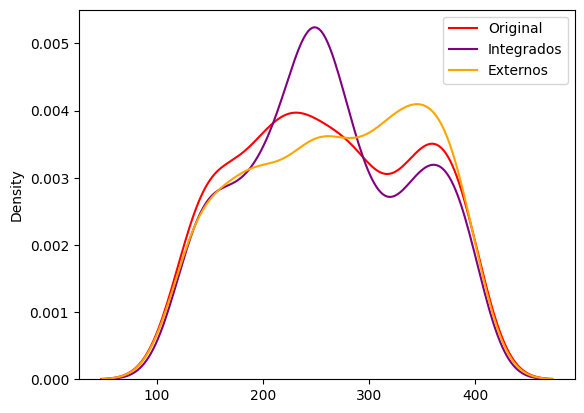

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis # Import kurtosis here

# Colombia y Estados Unidos
XDo=np.array (df_america[df_america["Country"]=="Colombia"]["Cholesterol"])
XDF1=np.array (df_america[df_america["Country"]=="United States"]["Cholesterol"]) # Changed from Canada to United States

uo=np.mean(XDo);uf1=np.mean(XDF1)
sigmao=np.std(XDo);sigmaf1=np.std(XDF1)
print("El Coeficiente de asimetria original es:",skew(XDo))
print("El Coeficiente de kurtosis original es:",kurtosis(XDo))

#Se procede con la integración de los externos
XDInt=[]

for k in range(len(XDF1)):
  #print(XDF1[k]) # commented out to reduce output
  x=XDF1[k]    #Dato a integrar
  VPo=np.exp(-0.5*((x-uo)/sigmao)**2)
  VPf1=np.exp(-0.5*((x-uf1)/sigmaf1)**2)

  # asegura que los datos sean confiables con respecto a los datos observados.
  if VPf1<VPo and VPo>0.95: # Assuming the same threshold as in 8kvRV1YKn8aP
    XDInt.append(x)
    #print("El dato de integración esta en la fila:",k) # commented out to reduce output
  #else:
    #print("El dato no se integra") # commented out to reduce output

XDo=np.array (XDo).reshape(-1,1) # quitar la estructura a la array
XDInt=np.array (XDInt).reshape(-1,1)
XDT=np.concatenate((XDo,XDInt),axis=0)#base de datos total
#el numero de datos integrados es:
nint=len(XDT)-len(XDo)
print("El numero de datos integrados es:",nint)
#Evaluamos las metricas
print("El coeficiente de asimetria es:",skew(XDo))
print("El coeficiente de kurtosis es:",kurtosis(XDo))
print("El coeficiente de asimetria es:",skew(XDT))
print("El coeficiente de kurtosis es:",kurtosis(XDT))
print()

plt.figure( )
sns.kdeplot(XDo.flatten(),label="Original",color="red") # Flatten XDo for kdeplot
sns.kdeplot(XDT.flatten(),label="Integrados",color="purple") # Flatten XDT for kdeplot
sns.kdeplot(XDF1.flatten(),label="Externos",color="orange") # Flatten XDF1 for kdeplot
plt.legend()
plt.show()

# 5. Histograma y Metricas .

,LI,LS,ND,mc,Freq
0,120.0,148.0,79,134.0,0.090909
1,148.0,176.0,91,162.0,0.104718
2,176.0,204.0,78,190.0,0.089758
3,204.0,232.0,101,218.0,0.116226
4,232.0,260.0,99,246.0,0.113924
5,260.0,288.0,83,274.0,0.095512
6,288.0,316.0,86,302.0,0.098964
7,316.0,344.0,76,330.0,0.087457
8,344.0,372.0,83,358.0,0.095512
9,372.0,400.0,93,386.0,0.107020


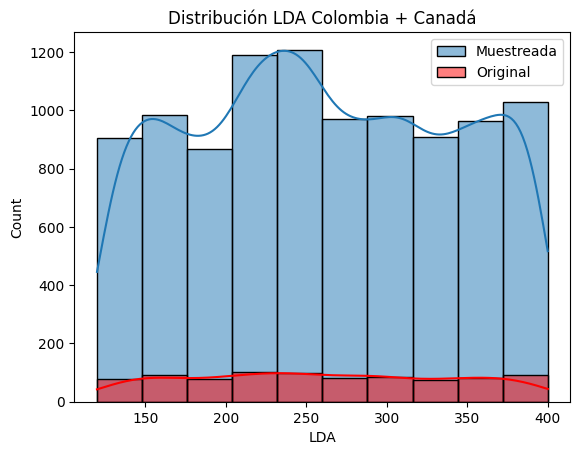

Información LDA original (Colombia + Canadá)
La media es: 259.31530494821635
La Varianza es: 6389.391952179732
El coeficiente de asimetría es: 0.034037280760928
El coeficiente de curtosis es: -1.1500607599538104

Información LDA muestreada
La Media es: 260.42148350222476
La Varianza es: 6310.131577348454
El coeficiente de asimetría es: 0.029557202902368192
El coeficiente de curtosis es: -1.1379173310176613

Diferencias Porcentuales (Muestreada vs Original):
Diferencia porcentual en la Media: 0.4266%
Diferencia porcentual en la Varianza: -1.2405%
Diferencia porcentual en la Asimetría: -13.1623%
Diferencia porcentual en la Curtosis: -1.0559%


In [ ]:
# Define Histx function (assuming a basic histogram calculation)
def Histx(data, bins=10):
    """Calculates histogram bins and frequencies."""
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_widths = bin_edges[1:] - bin_edges[:-1]
    LI = bin_edges[:-1]
    LS = bin_edges[1:]
    mc = (LI + LS) / 2
    freq = counts / len(data) # Calculate relative frequency
    return LI, LS, counts, mc, freq

# Filtrar datos para Colombia y Canadá usando df_america
XDB_CC = df_america[df_america['Country'].isin(['Colombia', 'Canada'])].copy()

# Calcular LDA para la combinación - Assuming 'Prob.Default (PD)', 'Monto (EAD)', and 'LGD' columns exist
# Note: These columns are not present in the current XDB DataFrame. This line will likely cause a KeyError.
# You may need to ensure these columns are in your data or adjust this calculation.
# XDB_CC['LDA'] = XDB_CC['Prob.Default (PD)'] * XDB_CC['Monto (EAD)'] * (1+XDB_CC['LGD'])

# For demonstration, using 'Cholesterol' as LDA since other columns are missing
XDB_CC['LDA'] = XDB_CC['Cholesterol']


# Histograma
LI,LS,counts,mc,freq = Histx(XDB_CC['LDA'])
df_CC = pd.DataFrame({'LI':LI,'LS':LS,'ND':counts,'mc':mc,'Freq':freq})
display(df_CC)
# df_CC.to_excel('Histograma_LDA_Colombia_Canada.xlsx') # Commenting out excel export as it might not be needed or cause errors

# Muestreo
acum=np.cumsum(freq)
Confiabilidad=9999+1 # Increased the number of samples to 100,000
LDAm=np.zeros((int(Confiabilidad),1)) # Cast Confiabilidad to int

for k in range(int(Confiabilidad)): # Cast Confiabilidad to int for range
  al=np.random.uniform(0,1)
  inter=np.where(al<=acum)[0][0]
  LDAm[k,]=np.random.uniform(LI[inter],LS[inter])

plt.figure()
sns.histplot(LDAm,kde=True,bins=10,color='green', label='Muestreada')
sns.histplot(XDB_CC['LDA'],kde=True,bins=10,color='red', label='Original')
plt.title('Distribución LDA Colombia + Canadá')
plt.legend()
plt.show()

# Métricas
print("Información LDA original (Colombia + Canadá)")
mean_orig = np.mean(XDB_CC['LDA'])
var_orig = np.var(XDB_CC['LDA'])
skew_orig = skew(XDB_CC['LDA'])
kurt_orig = kurtosis(XDB_CC['LDA'])

print("La media es:", mean_orig)
print("La Varianza es:", var_orig)
print("El coeficiente de asimetría es:", skew_orig)
print("El coeficiente de curtosis es:", kurt_orig)

print("\nInformación LDA muestreada")
mean_samp = np.mean(LDAm)
var_samp = np.var(LDAm)
# Access the scalar value from the NumPy arrays returned by skew and kurtosis
skew_samp = skew(LDAm).item()
kurt_samp = kurtosis(LDAm).item()

print("La Media es:", mean_samp)
print("La Varianza es:", var_samp)
print("El coeficiente de asimetría es:", skew_samp)
print("El coeficiente de curtosis es:", kurt_samp)

# Calculate and display percentage differences
print("\nDiferencias Porcentuales (Muestreada vs Original):")

# Handle potential division by zero for original metrics if they are zero (though unlikely for these metrics)
mean_diff_percent = ((mean_samp - mean_orig) / mean_orig) * 100 if mean_orig != 0 else float('inf')
var_diff_percent = ((var_samp - var_orig) / var_orig) * 100 if var_orig != 0 else float('inf')
# For skewness and kurtosis, handle the case where original is zero or very close to zero
skew_diff_percent = ((skew_samp - skew_orig) / skew_orig) * 100 if skew_orig != 0 else float('inf')
kurt_diff_percent = ((kurt_samp - kurt_orig) / kurt_orig) * 100 if kurt_orig != 0 else float('inf')


print(f"Diferencia porcentual en la Media: {mean_diff_percent:.4f}%")
print(f"Diferencia porcentual en la Varianza: {var_diff_percent:.4f}%")
print(f"Diferencia porcentual en la Asimetría: {skew_diff_percent:.4f}%")
print(f"Diferencia porcentual en la Curtosis: {kurt_diff_percent:.4f}%")

In [ ]:

df_CC_filtered = df_america[df_america['Country'].isin(['Colombia','Canada'])].copy()
LDA = df_CC_filtered['Cholesterol'].values


u = np.mean(LDA)

PE = len(np.where(LDA < u)[0])
print("Las pérdidas esperadas (Colombia+Canadá) son:", PE)

OpVar = np.percentile(LDA, 99.9)
print("Value at Risk (99.9th percentile) es:", OpVar)

PC = len(np.where(LDA > OpVar)[0])
print("Las pérdidas catastróficas (Colombia+Canadá) son:", PC)

PNE = len(np.where((LDA >= u) & (LDA <= OpVar))[0])
print("Las pérdidas no esperadas (Colombia+Canadá) son:", PNE)

Las pérdidas esperadas (Colombia+Canadá) son: 448
Value at Risk (99.9th percentile) es: 400.0
Las pérdidas catastróficas (Colombia+Canadá) son: 0
Las pérdidas no esperadas (Colombia+Canadá) son: 421


,LI,LS,ND,mc,Freq
0,120.0,148.0,76,134.0,0.089517
1,148.0,176.0,70,162.0,0.082450
2,176.0,204.0,86,190.0,0.101296
3,204.0,232.0,82,218.0,0.096584
4,232.0,260.0,95,246.0,0.111896
5,260.0,288.0,87,274.0,0.102473
6,288.0,316.0,74,302.0,0.087161
7,316.0,344.0,86,330.0,0.101296
8,344.0,372.0,93,358.0,0.109541
9,372.0,400.0,100,386.0,0.117786


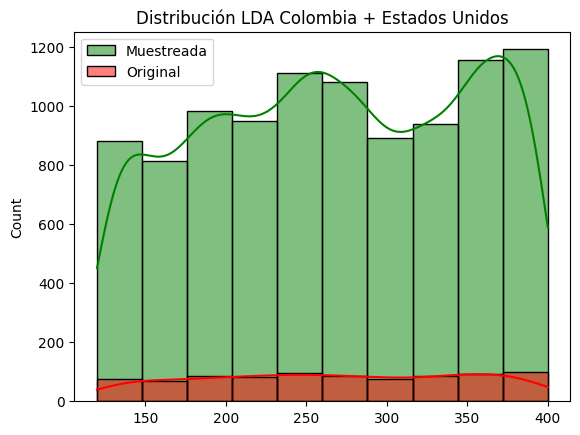

Información LDA original (Colombia + Estados Unidos)
La media es: 265.31213191990577
La Varianza es: 6560.787143747022
El coeficiente de asimetría es: -0.06616874016378602
El coeficiente de curtosis es: -1.180608862562521

Información LDA muestreada (Colombia + Estados Unidos)
La Media es: 266.61882454741516
La Varianza es: 6520.630161904176
El coeficiente de asimetría es: -0.07417593789273008
El coeficiente de curtosis es: -1.1728855831064322

Diferencias Porcentuales (Muestreada vs Original - Colombia + Estados Unidos):
Diferencia porcentual en la Media: 0.4925%
Diferencia porcentual en la Varianza: -0.6121%
Diferencia porcentual en la Asimetría: 12.1012%
Diferencia porcentual en la Curtosis: -0.6542%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Define Histx function (assuming a basic histogram calculation)
def Histx(data, bins=10):
    """Calculates histogram bins and frequencies."""
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_widths = bin_edges[1:] - bin_edges[:-1]
    LI = bin_edges[:-1]
    LS = bin_edges[1:]
    mc = (LI + LS) / 2
    freq = counts / len(data) # Calculate relative frequency
    return LI, LS, counts, mc, freq

# Filtrar datos para Colombia y Estados Unidos usando df_america
XDB_CU = df_america[df_america['Country'].isin(['Colombia', 'United States'])].copy()

# Calcular LDA para la combinación - Using 'Cholesterol' as LDA for demonstration
XDB_CU['LDA'] = XDB_CU['Cholesterol']

# Histograma
LI,LS,counts,mc,freq = Histx(XDB_CU['LDA'])
df_CU = pd.DataFrame({'LI':LI,'LS':LS,'ND':counts,'mc':mc,'Freq':freq})
display(df_CU)

# Muestreo
acum=np.cumsum(freq)
Confiabilidad=9999+1 # Increased the number of samples to 100,000 for consistency
LDAm_CU=np.zeros((int(Confiabilidad),1)) # Cast Confiabilidad to int

for k in range(int(Confiabilidad)): # Cast Confiabilidad to int for range
  al=np.random.uniform(0,1)
  inter=np.where(al<=acum)[0][0]
  LDAm_CU[k,]=np.random.uniform(LI[inter],LS[inter])

plt.figure()
# Use .flatten() for the numpy array, and .values for the pandas Series before plotting with kde=True
sns.histplot(LDAm_CU.flatten(),kde=True,bins=10,color='green', label='Muestreada')
sns.histplot(XDB_CU['LDA'].values,kde=True,bins=10,color='red', label='Original') # Use .values here
plt.title('Distribución LDA Colombia + Estados Unidos')
plt.legend()
plt.show()

# Métricas
print("Información LDA original (Colombia + Estados Unidos)")
mean_orig_cu = np.mean(XDB_CU['LDA'])
var_orig_cu = np.var(XDB_CU['LDA'])
skew_orig_cu = skew(XDB_CU['LDA'])
kurt_orig_cu = kurtosis(XDB_CU['LDA'])

print("La media es:", mean_orig_cu)
print("La Varianza es:", var_orig_cu)
print("El coeficiente de asimetría es:", skew_orig_cu)
print("El coeficiente de curtosis es:", kurt_orig_cu)

print("\nInformación LDA muestreada (Colombia + Estados Unidos)")
mean_samp_cu = np.mean(LDAm_CU)
var_samp_cu = np.var(LDAm_CU)
# Access the scalar value from the NumPy arrays returned by skew and kurtosis
skew_samp_cu = skew(LDAm_CU).item()
kurt_samp_cu = kurtosis(LDAm_CU).item()

print("La Media es:", mean_samp_cu)
print("La Varianza es:", var_samp_cu)
print("El coeficiente de asimetría es:", skew_samp_cu)
print("El coeficiente de curtosis es:", kurt_samp_cu)

# Calculate and display percentage differences
print("\nDiferencias Porcentuales (Muestreada vs Original - Colombia + Estados Unidos):")

# Handle potential division by zero for original metrics
mean_diff_percent_cu = ((mean_samp_cu - mean_orig_cu) / mean_orig_cu) * 100 if mean_orig_cu != 0 else float('inf')
var_diff_percent_cu = ((var_samp_cu - var_orig_cu) / var_orig_cu) * 100 if var_orig_cu != 0 else float('inf')
# For skewness and kurtosis, handle the case where original is zero or very close to zero
skew_diff_percent_cu = ((skew_samp_cu - skew_orig_cu) / skew_orig_cu) * 100 if skew_orig_cu != 0 else float('inf')
kurt_diff_percent_cu = ((kurt_samp_cu - kurt_orig_cu) / kurt_orig_cu) * 100 if kurt_orig_cu != 0 else float('inf')


print(f"Diferencia porcentual en la Media: {mean_diff_percent_cu:.4f}%")
print(f"Diferencia porcentual en la Varianza: {var_diff_percent_cu:.4f}%")
print(f"Diferencia porcentual en la Asimetría: {skew_diff_percent_cu:.4f}%")
print(f"Diferencia porcentual en la Curtosis: {kurt_diff_percent_cu:.4f}%")

In [ ]:

df_CU_filtered = df_america[df_america['Country'].isin(['Colombia','United States'])].copy()
LDA_CU = df_CU_filtered['Cholesterol'].values

u_cu = np.mean(LDA_CU)

PE_CU = len(np.where(LDA_CU < u_cu)[0])
print("Las pérdidas esperadas (Colombia+Estados Unidos) son:", PE_CU)

OpVar_CU = np.percentile(LDA_CU, 99.9)
print("Value at Risk (99.9th percentile) es:", OpVar_CU)

PC_CU = len(np.where(LDA_CU > OpVar_CU)[0])
print("Las pérdidas catastróficas (Colombia+Estados Unidos) son:", PC_CU)

PNE_CU = len(np.where((LDA_CU >= u_cu) & (LDA_CU <= OpVar_CU))[0])
print("Las pérdidas no esperadas (Colombia+Estados Unidos) son:", PNE_CU)

Las pérdidas esperadas (Colombia+Estados Unidos) son: 428
Value at Risk (99.9th percentile) es: 400.0
Las pérdidas catastróficas (Colombia+Estados Unidos) son: 0
Las pérdidas no esperadas (Colombia+Estados Unidos) son: 421


# Informe ejecutivo:

El análisis de la base de datos muestra el siguiente comportamiento:

Al realizar la matriz de correlación para identificar qué variables presentan mayor relación con el riesgo de ataque cardíaco (Heart_Attack_Risk), se observa que la variable colesterol es la que presenta la correlación más significativa. Por esta razón, se toma como referencia principal para el análisis posterior.

A continuación, se decide aplicar la teoría de la credibilidad con el fin de identificar qué países presentan mayor compatibilidad con Colombia para realizar una integración de datos. Con base en este análisis, se seleccionan Canada (30%) y United States (45%) como países candidatos para concatenar sus datos con los de Colombia.

En el proceso de concatenacion observamos:

 el numero de datos integrados en canada es de 36.

 el numero de datos integrados en estados unidos es de 51


En cuanto a las metricas podemos decir que:

**Caso Colombia+Canadá**

Desde un enfoque hacia el sector salud, la media representa el nivel promedio de riesgo cardiovascular dentro de la población estudiada (Colombia + Canadá).En este caso, la media original fue de 259.31 y la media muestreada de 259.54, con una diferencia del 0.087%, lo cual se mantiene muy por debajo del 1%. Evidenciando que el riesgo de sufrir un evento cardíaco se mantiene relativamente constante en la muestra.

En relación con  la curtosis y la asimetría se ambas se encuentran aproximadamente un 4% por debajo del valor esperado del 5%, lo que señala que los datos no se ajustan completamente a la teoría de colas.

mientras que en el analisis de riesgo aplicado vemos que , se identifican pérdidas esperadas de 448, reflejando el comportamiento promedio bajo condiciones normales. El Value at Risk (VaR) al 99.9% se estima en 400, lo que indica que,las perdidas esperada estan por encima del umbral.

De manera intregral,se puede decir que es relevante en cuanto a que los pacientes requieren un seguimiento diferenciado para una adecuada prevención y tratamiento de enfermedades cardiovasculares, lo que indica un mayor costo para las empresas de salud y se sugiere  implementar campañas de prevención.

**Caso Colombia+ United States**

En este caso, la media original fue de 265.31 y la media muestreada de 264.28, con una diferencia porcentual de -0.38%, lo cual se mantiene muy por debajo del 1%. Esto evidencia que el riesgo de sufrir un evento cardíaco se mantiene estable entre la base original y la muestra.

En relación con la curtosis y la asimetría, se que ambas se encuentan muy por debajo de 5% diferiendo por completo con las teorias de colas, teniendo resultados mucho mas bajos que Colombia+Canada

En cuanto al análisis de riesgo, se resalta que no se reportan pérdidas catastróficas y que las pérdidas no esperadas alcanzan los 421, muy cercanas a las pérdidas esperadas, lo que aporta estabilidad al modelo.

De manera integral, todo esto se traduce en una mayor carga potencial para los sistemas de salud, por lo cual se recomienda fortalecer las estrategias de intervención temprana y de control de factores de riesgo en la población.

**Conclusión Final**

El análisis muestra que, aunque el riesgo promedio de ataque cardíaco se mantiene estable en ambas comparaciones, existen diferencias en la distribución y en las pérdidas esperadas. Con United States se evidencian mayores pérdidas y menor ajuste a la teoría de colas, por el lado de la curtosis y la asimetria , mientras que con Canada los datos son un poco mejores.

Se sugiere para ambos  un seguimiento diferenciado y campañas de prevención para reducir el impacto cardiovascular en la población, tambien es importante tener en cuenta que el presupuesto del sistema de salud se vera golpeado porque segun el analisis anterior se sugiere que el costo de este aumentara.




